This is the beginning of the project. Comments have been added where needed in order to understand what the program is doing.

This is the priliminary data analysis. The data analysis has been done in order to understand the dataset entirely so that certain decisioncs can be taken while building the model.

In [ ]:
#import libraries for analysis
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:

#add the secom.data file here
secom_data = pd.read_csv("secom.data", delimiter=' ', header=None, na_values='NaN')
print(secom_data.shape)
#add the secom.lables file here
secom_labels = pd.read_csv("secom_labels.data", delimiter=' ', header=None, na_values='NaN')
print(secom_labels.shape)


(1567, 590)
(1567, 2)


Every feature has been assigned a name, Feature_1 and so on.
The target variable column has been given a name accordingly.

In [ ]:
secom_data.columns = [f"Feature_{i}" for i in range(1, len(secom_data.columns) + 1)]
secom_labels.columns = ["Pass/Fail", "Timestamp"]
secom_labels["Timestamp"] = pd.to_datetime(secom_labels["Timestamp"])

C:\Users\SpoorthiRanganath\AppData\Local\Temp\ipykernel_26436\3808236283.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  secom_labels["Timestamp"] = pd.to_datetime(secom_labels["Timestamp"])


In [ ]:
#the two datasets have been joined together
secom_dataset = pd.concat([secom_data, secom_labels], axis=1)
secom_dataset = secom_dataset[['Timestamp'] + list(secom_data.columns) + ['Pass/Fail']]
print(secom_dataset.head())

            Timestamp  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0 2008-07-19 11:55:00    3030.93    2564.00  2187.7333  1411.1265     1.3602   
1 2008-07-19 12:32:00    3095.78    2465.14  2230.4222  1463.6606     0.8294   
2 2008-07-19 13:17:00    2932.61    2559.94  2186.4111  1698.0172     1.5102   
3 2008-07-19 14:43:00    2988.72    2479.90  2199.0333   909.7926     1.3204   
4 2008-07-19 15:22:00    3032.24    2502.87  2233.3667  1326.5200     1.5334   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_582  Feature_583  \
0      100.0    97.6133     0.1242     1.5005  ...          NaN       0.5005   
1      100.0   102.3433     0.1247     1.4966  ...     208.2045       0.5019   
2      100.0    95.4878     0.1241     1.4436  ...      82.8602       0.4958   
3      100.0   104.2367     0.1217     1.4882  ...      73.8432       0.4990   
4      100.0   100.3967     0.1235     1.5031  ...          NaN       0.4800   

   Feature_584  Feature_585  Feature_5

In [ ]:
secom_dataset.isnull().any().any()

True

In [ ]:
secom_dataset.to_csv("secom_data.csv", index=False)
secom_df = secom_dataset #saved it as csv so that loading the dataset can be easy

In [ ]:
secom_dataset.dtypes
print(secom_dataset.shape)

(1567, 592)


In [ ]:
secom_dataset.describe().transpose()

count                           mean                  min  \
Timestamp      1567  2008-09-09 18:37:39.859604224  2008-07-19 11:55:00   
Feature_1    1561.0                    3014.452896              2743.24   
Feature_2    1560.0                    2495.850231              2158.75   
Feature_3    1553.0                    2200.547318              2060.66   
Feature_4    1553.0                    1396.376627                  0.0   
...             ...                            ...                  ...   
Feature_587  1566.0                       0.021458              -0.0169   
Feature_588  1566.0                       0.016475               0.0032   
Feature_589  1566.0                       0.005283                0.001   
Feature_590  1566.0                      99.670066                  0.0   
Pass/Fail    1567.0                      -0.867262                 -1.0   

                             25%                  50%                  75%  \
Timestamp    2008-08-22 00:55:30  2008-09-11 08:06:00  2008-09-29 11:33:00   
Feature_1                2966.26              3011.49              3056.65   
Feature_2              2452.2475             2499.405            2538.8225   
Feature_3              2181.0444            2201.0667            2218.0555   
Feature_4              1081.8758            1285.2144            1591.2235   
...                          ...                  ...                  ...   
Feature_587             0.013425               0.0205               0.0276   
Feature_588               0.0106               0.0148               0.0203   
Feature_589               0.0033               0.0046               0.0064   
Feature_590              44.3686              71.9005             114.7497   
Pass/Fail                   -1.0                 -1.0                 -1.0   

                             max        std  
Timestamp    2008-10-17 06:07:00        NaN  
Feature_1                3356.35  73.621787  
Feature_2                2846.44  80.407705  
Feature_3              2315.2667  29.513152  
Feature_4              3715.0417  441.69164  
...                          ...        ...  
Feature_587               0.1028   0.012358  
Feature_588               0.0799   0.008808  
Feature_589               0.0286   0.002867  
Feature_590             737.3048  93.891919  
Pass/Fail                    1.0    0.49801  

[592 rows x 8 columns]

In [ ]:
data = secom_dataset

PRELIMINARY TIMESTAMP Analysis

In [ ]:
from datetime import datetime
data['year'] = pd.DatetimeIndex(data['Timestamp']).year
data['month'] = pd.DatetimeIndex(data['Timestamp']).month
data['date'] = pd.DatetimeIndex(data['Timestamp']).day
data['week_day'] = pd.DatetimeIndex(data['Timestamp']).weekday
data['start_time'] = pd.DatetimeIndex(data['Timestamp']).time
data['hour'] = pd.DatetimeIndex(data['Timestamp']).hour
data['min'] = pd.DatetimeIndex(data['Timestamp']).minute

In [ ]:
print("Year: ", data.year.unique())
print("Month: ", data.month.unique())
print("Date: ", data.date.unique())
print("Weekday: ", data.week_day.unique())

Year:  [2008]
Month:  [ 7  8  9 10]
Date:  [19 20 21 22 23 25 27 28 29 30 31  1  2  3  4  5  6  7  8  9 10 11 12 13
 15 16 17 18 24 14 26]
Weekday:  [5 6 0 1 2 4 3]


C:\Users\SpoorthiRanganath\AppData\Local\Temp\ipykernel_26436\2954178195.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Pass/Fail'] == -1]['hour'], color='g')
C:\Users\SpoorthiRanganath\AppData\Local\Temp\ipykernel_26436\2954178195.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

<Axes: xlabel='min', ylabel='Density'>

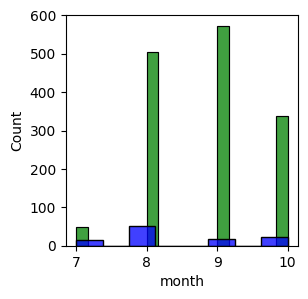

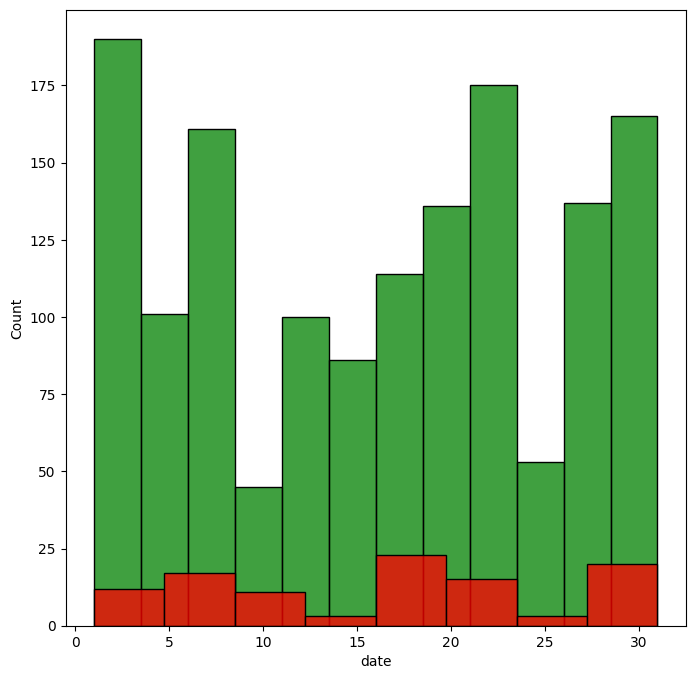

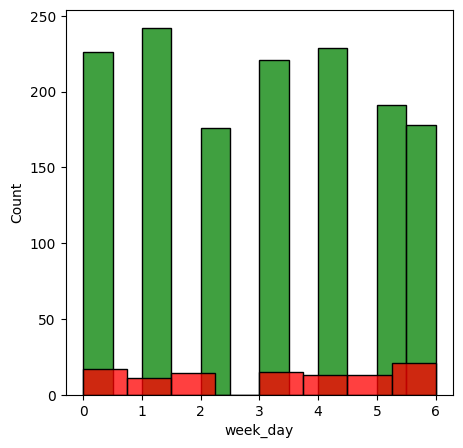

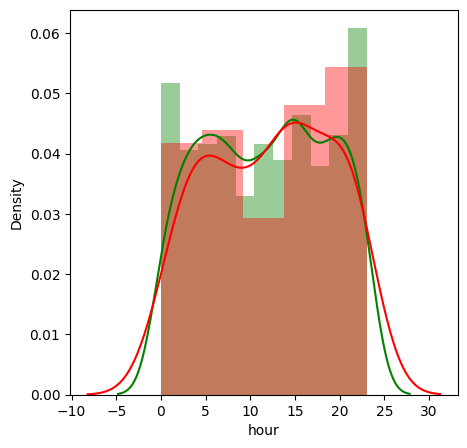

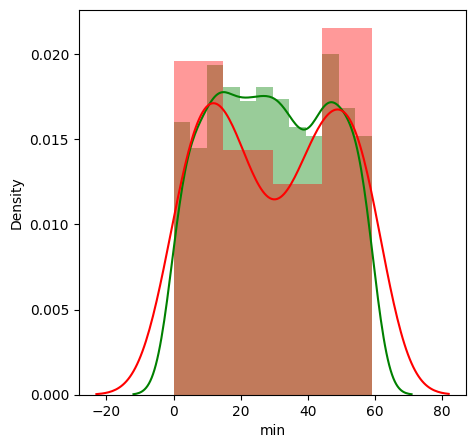

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
sns.histplot(data[data['Pass/Fail'] == -1]['month'], color='g')
sns.histplot(data[data['Pass/Fail'] == 1]['month'], color='b')

plt.figure(figsize=(8, 8))
sns.histplot(data[data['Pass/Fail'] == -1]['date'], color='g')
sns.histplot(data[data['Pass/Fail'] == 1]['date'], color='r')

plt.figure(figsize=(5, 5))
sns.histplot(data[data['Pass/Fail'] == -1]['week_day'], color='g')
sns.histplot(data[data['Pass/Fail'] == 1]['week_day'], color='r')

plt.figure(figsize=(5, 5))
sns.distplot(data[data['Pass/Fail'] == -1]['hour'], color='g')
sns.distplot(data[data['Pass/Fail'] == 1]['hour'], color='r')

plt.figure(figsize=(5, 5))
sns.distplot(data[data['Pass/Fail'] == -1]['min'], color='g')
sns.distplot(data[data['Pass/Fail'] == 1]['min'], color='r')

Realising that the Timestamp column had no significance, the timestamp column has been dropped

In [ ]:

secom_dataset = secom_dataset.drop['Timestamp']

TypeError: 'method' object is not subscriptable

NULL VALUES ANALYSIS

In [ ]:
def null_values(df):
    """a function to show null values' percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(
        columns={0:'Missing_Records', 1:'Percentage (%)'})

    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

df_nullvalues = null_values(secom_dataset)
print(df_nullvalues)

             Missing_Records  Percentage (%)
Feature_293             1429       91.193363
Feature_294             1429       91.193363
Feature_158             1429       91.193363
Feature_159             1429       91.193363
Feature_359             1341       85.577537
...                      ...             ...
Feature_457                1        0.063816
Feature_219                1        0.063816
Feature_357                1        0.063816
Feature_458                1        0.063816
Feature_590                1        0.063816

[538 rows x 2 columns]


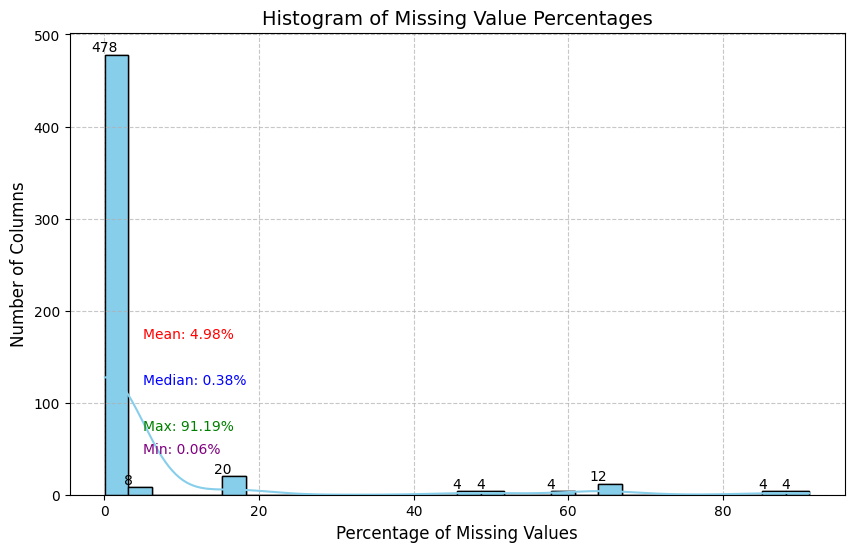

In [ ]:
def plot_missing_values(df):
    """A function to plot the histogram of missing values' percentage"""
    missing_percentage = 100 * df.isnull().sum() / len(df)
    missing_percentage = missing_percentage[missing_percentage > 0]
    plt.figure(figsize=(10, 6))
    sns.histplot(missing_percentage, bins=30, kde = True, color='skyblue', edgecolor='black')
    plt.xlabel('Percentage of Missing Values', fontsize=12)
    plt.ylabel('Number of Columns', fontsize=12)
    plt.title('Histogram of Missing Value Percentages', fontsize=14)
    plt.text(5, 170, f"Mean: {missing_percentage.mean():.2f}%", fontsize=10, color='red')
    plt.text(5, 120, f"Median: {missing_percentage.median():.2f}%", fontsize=10, color='blue')
    plt.text(5, 70, f"Max: {missing_percentage.max():.2f}%", fontsize=10, color='green')
    plt.text(5, 45, f"Min: {missing_percentage.min():.2f}%", fontsize=10, color='purple')

    counts, bins, _ = plt.hist(missing_percentage, bins=30, color='skyblue', edgecolor='black')
    min_count = 4
    for i in range(len(bins) - 1):
        if counts[i] >= min_count:
            plt.text(bins[i], counts[i], str(int(counts[i])), ha='center', va='bottom')

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

plot_missing_values(secom_df)

In [ ]:
secom_df = secom_df.drop('year', axis=1)

CORRELATION ANALYSIS

In [ ]:
#  data types of each column
print(secom_df.dtypes)


Feature_1     float64
Feature_2     float64
Feature_3     float64
Feature_4     float64
Feature_5     float64
               ...   
date            int32
week_day        int32
start_time     object
hour            int32
min             int32
Length: 598, dtype: object


In [ ]:
secom_df = secom_df.select_dtypes(include=['number'])

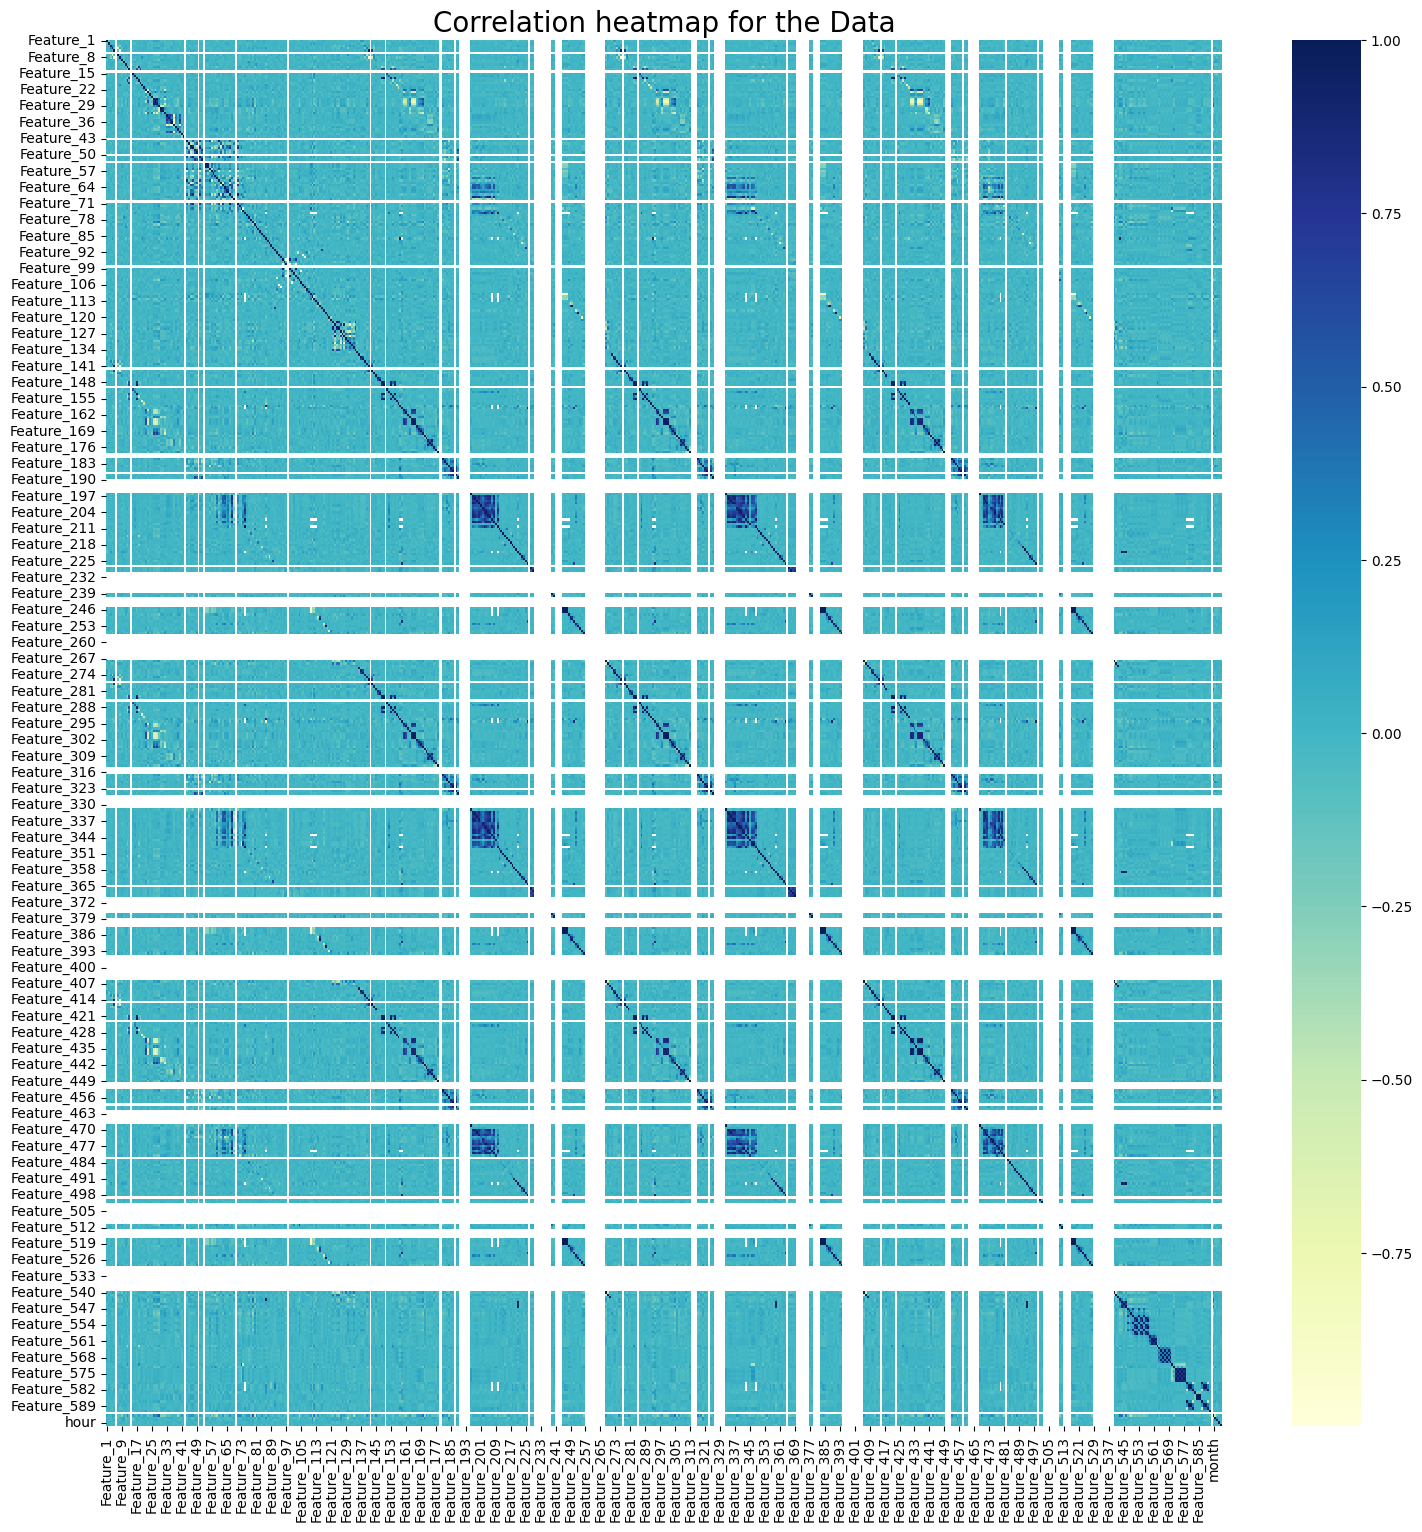

Strong Correlations:
           Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
Feature_1        NaN        NaN        NaN        NaN        NaN        NaN   
Feature_2        NaN        NaN        NaN        NaN        NaN        NaN   
Feature_3        NaN        NaN        NaN        NaN        NaN        NaN   
Feature_4        NaN        NaN        NaN        NaN        NaN        NaN   
Feature_5        NaN        NaN        NaN        NaN        NaN        NaN   
...              ...        ...        ...        ...        ...        ...   
month            NaN        NaN        NaN        NaN        NaN        NaN   
date             NaN        NaN        NaN        NaN        NaN        NaN   
week_day         NaN        NaN        NaN        NaN        NaN        NaN   
hour             NaN        NaN        NaN        NaN        NaN        NaN   
min              NaN        NaN        NaN        NaN        NaN        NaN   

           Feature_7  Feature_

In [ ]:
corrMatrix = secom_df.corr()

#heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(corrMatrix, cmap="YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize=20)
plt.show()

#strong correlations
strong_correlations = corrMatrix[(corrMatrix.abs() > 0.7) & (corrMatrix.abs() < 0.99)]
print("Strong Correlations:")
print(strong_correlations)

# Printing highly correlated features
highly_correlated_features = set()
for i in range(len(corrMatrix.columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i, j]) > 0.7:
            colname = corrMatrix.columns[i]
            highly_correlated_features.add(colname)
print("Highly Correlated Features:")
print(highly_correlated_features)

VARIANCES ANALYSIS

In [ ]:
numeric_df = secom_df.select_dtypes(include=[float, int])

def calculate_variance(series):
    n = len(series)
    mean = series.mean()
    deviations_squared = (series - mean) ** 2
    variance = deviations_squared.sum() / n
    return variance
variances = numeric_df.apply(calculate_variance)
variances_df = pd.DataFrame(variances, columns=['Variance'])
zero_variance_features = variances_df[variances_df['Variance'] == 0]
zero_variance_count = zero_variance_features.shape[0]
print(zero_variance_features)
print(f"features with zero variance: {zero_variance_count}")

             Variance
Feature_6         0.0
Feature_14        0.0
Feature_43        0.0
Feature_50        0.0
Feature_53        0.0
...               ...
Feature_535       0.0
Feature_536       0.0
Feature_537       0.0
Feature_538       0.0
Feature_539       0.0

[116 rows x 1 columns]
features with zero variance: 116


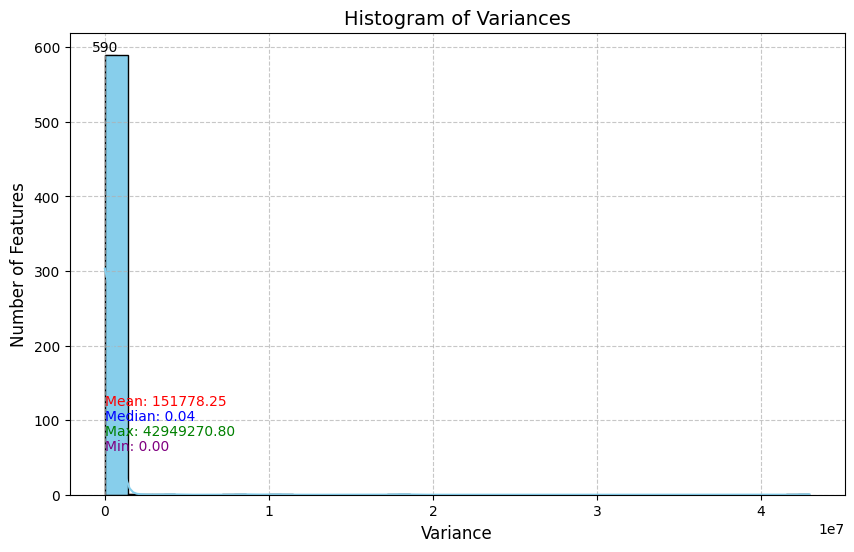

In [ ]:
def plot_variances(df):
    """A function to plot the histogram of variances"""
    variances = df.var()
    plt.figure(figsize=(10, 6))
    sns.histplot(variances, bins=60, kde=True, color='skyblue', edgecolor='black')
    plt.xlabel('Variance', fontsize=12)
    plt.ylabel('Number of Features', fontsize=12)
    plt.title('Histogram of Variances', fontsize=14)
    plt.text(0.5, 120, f"Mean: {variances.mean():.2f}", fontsize=10, color='red')
    plt.text(0.5, 100, f"Median: {variances.median():.2f}", fontsize=10, color='blue')
    plt.text(0.5, 80, f"Max: {variances.max():.2f}", fontsize=10, color='green')
    plt.text(0.5, 60, f"Min: {variances.min():.2f}", fontsize=10, color='purple')

    counts, bins, _ = plt.hist(variances, bins=30, color='skyblue', edgecolor='black')
    min_count = 4
    for i in range(len(bins) - 1):
        if counts[i] >= min_count:
            plt.text(bins[i], counts[i], str(int(counts[i])), ha='center', va='bottom')

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

plot_variances(secom_df)

TARGET VARIABLES ANALYSIS

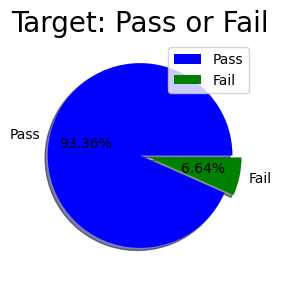

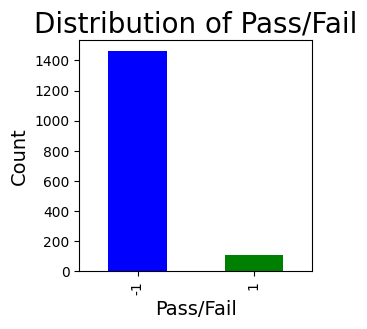

In [ ]:
labels = ['Pass', 'Fail']
size = secom_df['Pass/Fail'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (3, 3)
plt.pie(size, labels=labels, colors=colors, explode=explode, autopct="%.2f%%", shadow=True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize=20)
plt.legend()
plt.show()

secom_df['Pass/Fail'].value_counts().plot(kind="bar", color = ['blue', 'green'])
plt.title('Distribution of Pass/Fail', fontsize=20)
plt.xlabel('Pass/Fail', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X = secom_df.drop(columns=['Pass/Fail'])
y = secom_df['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


train_data.describe()

Feature_1    Feature_2    Feature_3    Feature_4    Feature_5  \
count  1171.000000  1171.000000  1165.000000  1165.000000  1165.000000   
mean   3013.419061  2496.816618  2200.105000  1394.005958     3.241597   
std      72.503632    80.390473    29.581629   437.817815    46.005815   
min    2743.240000  2162.870000  2060.660000   711.025800     0.681500   
25%    2965.700000  2453.535000  2181.155500  1080.498500     1.016000   
50%    3010.830000  2500.050000  2200.733300  1285.214400     1.317100   
75%    3055.505000  2539.670000  2218.055500  1588.509000     1.529100   
max    3356.350000  2846.440000  2315.266700  3715.041700  1112.160000   

       Feature_6    Feature_7    Feature_8    Feature_9   Feature_10  ...  \
count     1165.0  1165.000000  1169.000000  1173.000000  1173.000000  ...   
mean       100.0   101.172795     0.121944     1.464067    -0.001215  ...   
std          0.0     6.264311     0.008222     0.074067     0.015227  ...   
min        100.0    82.131100     0.000000     1.191000    -0.041000  ...   
25%        100.0    98.004400     0.121100     1.411500    -0.011000  ...   
50%        100.0   101.512200     0.122400     1.463600    -0.001600  ...   
75%        100.0   104.615600     0.123800     1.518900     0.008100  ...   
max        100.0   129.252200     0.128600     1.656400     0.074900  ...   

       Feature_587  Feature_588  Feature_589  Feature_590        month  \
count  1174.000000  1174.000000  1174.000000  1174.000000  1175.000000   
mean      0.021721     0.016349     0.005246    98.422669     8.780426   
std       0.012538     0.008385     0.002730    93.479637     0.825153   
min      -0.016900     0.003200     0.001000     0.000000     7.000000   
25%       0.013725     0.010700     0.003400    44.120050     8.000000   
50%       0.020750     0.014800     0.004600    71.900500     9.000000   
75%       0.027700     0.020275     0.006400   114.287800     9.000000   
max       0.102800     0.079900     0.028600   737.304800    10.000000   

             date     week_day         hour          min    Pass/Fail  
count  1175.00000  1175.000000  1175.000000  1175.000000  1175.000000  
mean     15.93617     2.894468    11.863830    29.704681    -0.867234  
std       9.29418     1.989948     6.828528    17.450258     0.498113  
min       1.00000     0.000000     0.000000     0.000000    -1.000000  
25%       7.00000     1.000000     6.000000    15.000000    -1.000000  
50%      17.00000     3.000000    12.000000    29.000000    -1.000000  
75%      23.00000     5.000000    18.000000    45.000000    -1.000000  
max      31.00000     6.000000    23.000000    59.000000     1.000000  

[8 rows x 596 columns]

In [ ]:

num_features = X_train.shape[1]

rows = num_features // 5 + (num_features % 5 > 0)
X_train.hist(bins=15, figsize=(20, rows * 4), layout=(rows, 5))
plt.show()

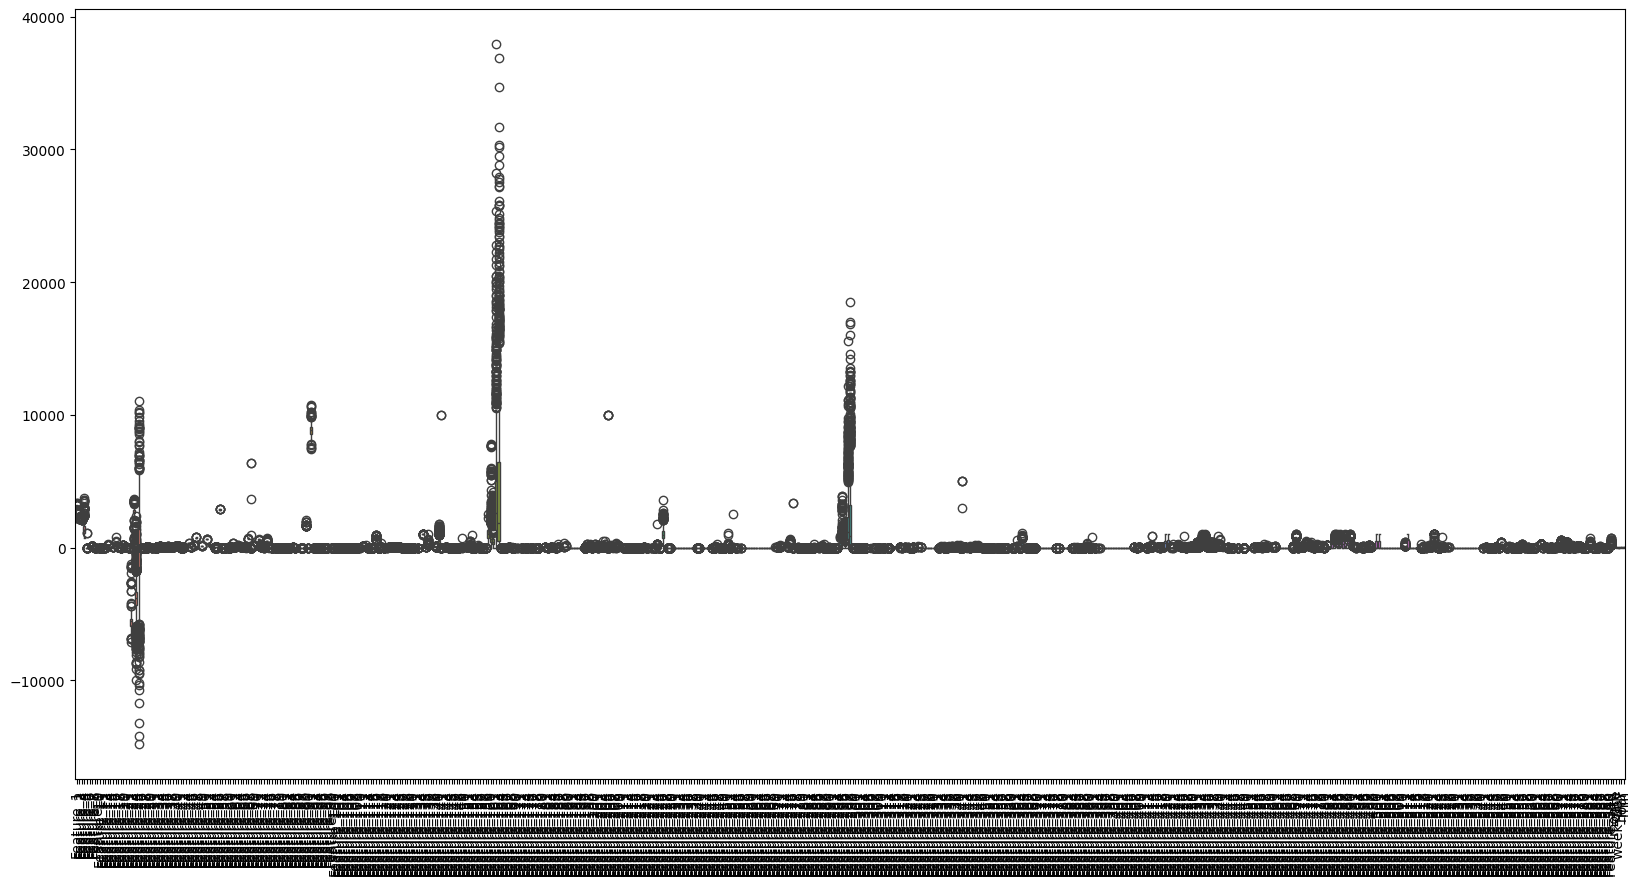

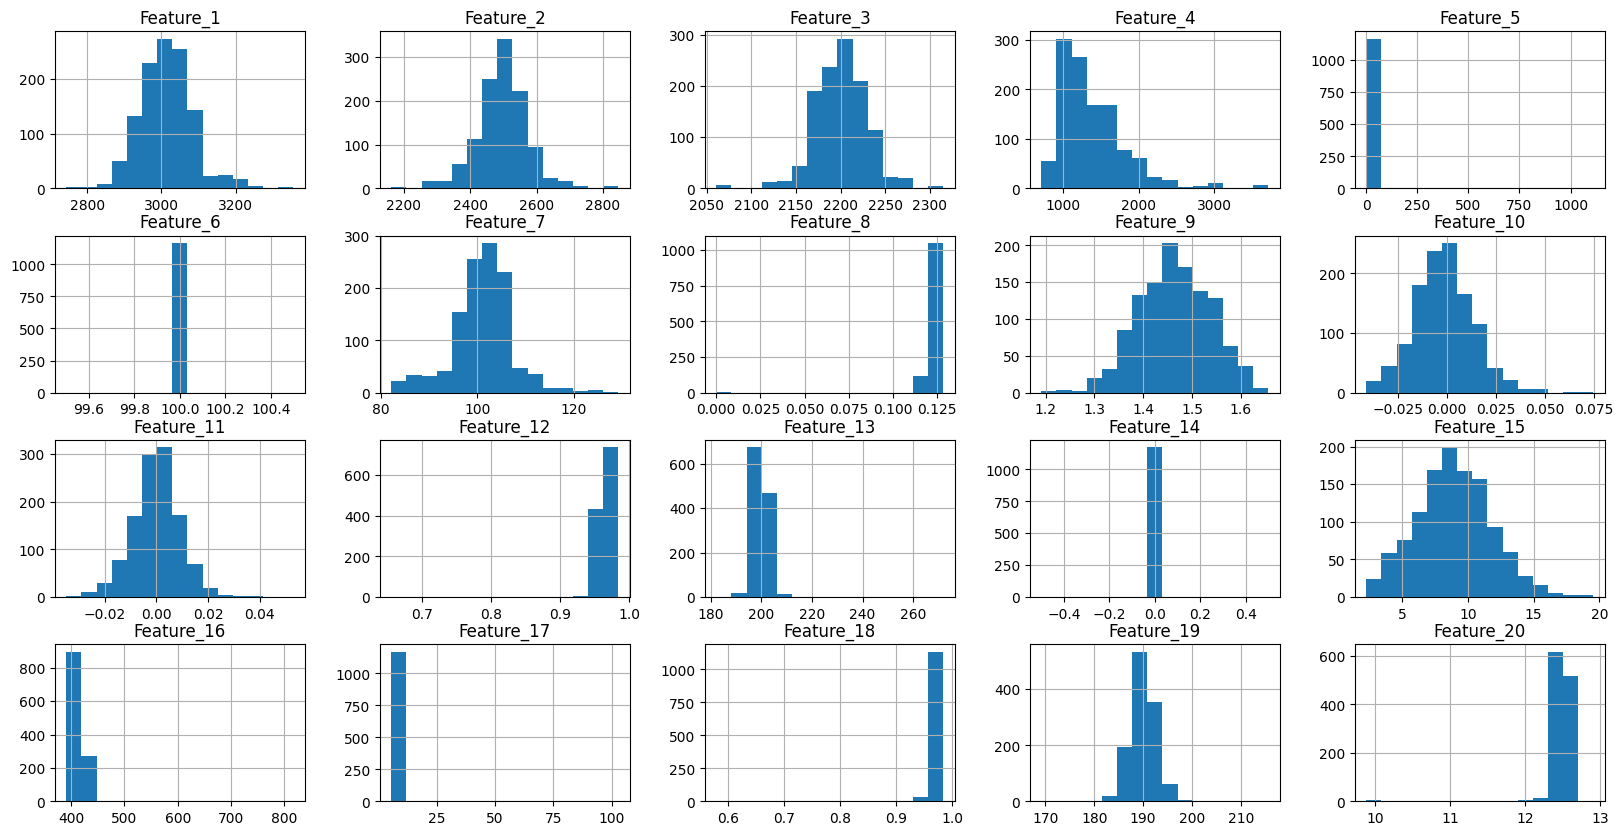

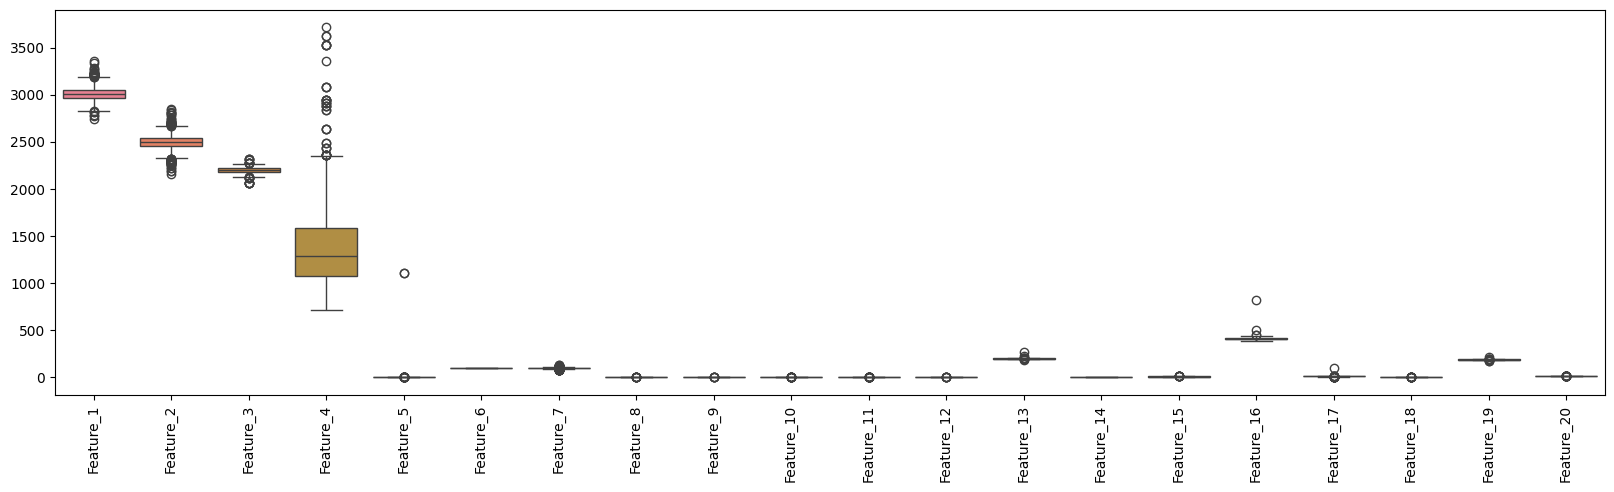

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.show()

subset_features = X_train.columns[:20]
X_train[subset_features].hist(bins=15, figsize=(20, 10), layout=(4, 5))
plt.show()

plt.figure(figsize=(20, 5))
sns.boxplot(data=X_train[subset_features])
plt.xticks(rotation=90)
plt.show()

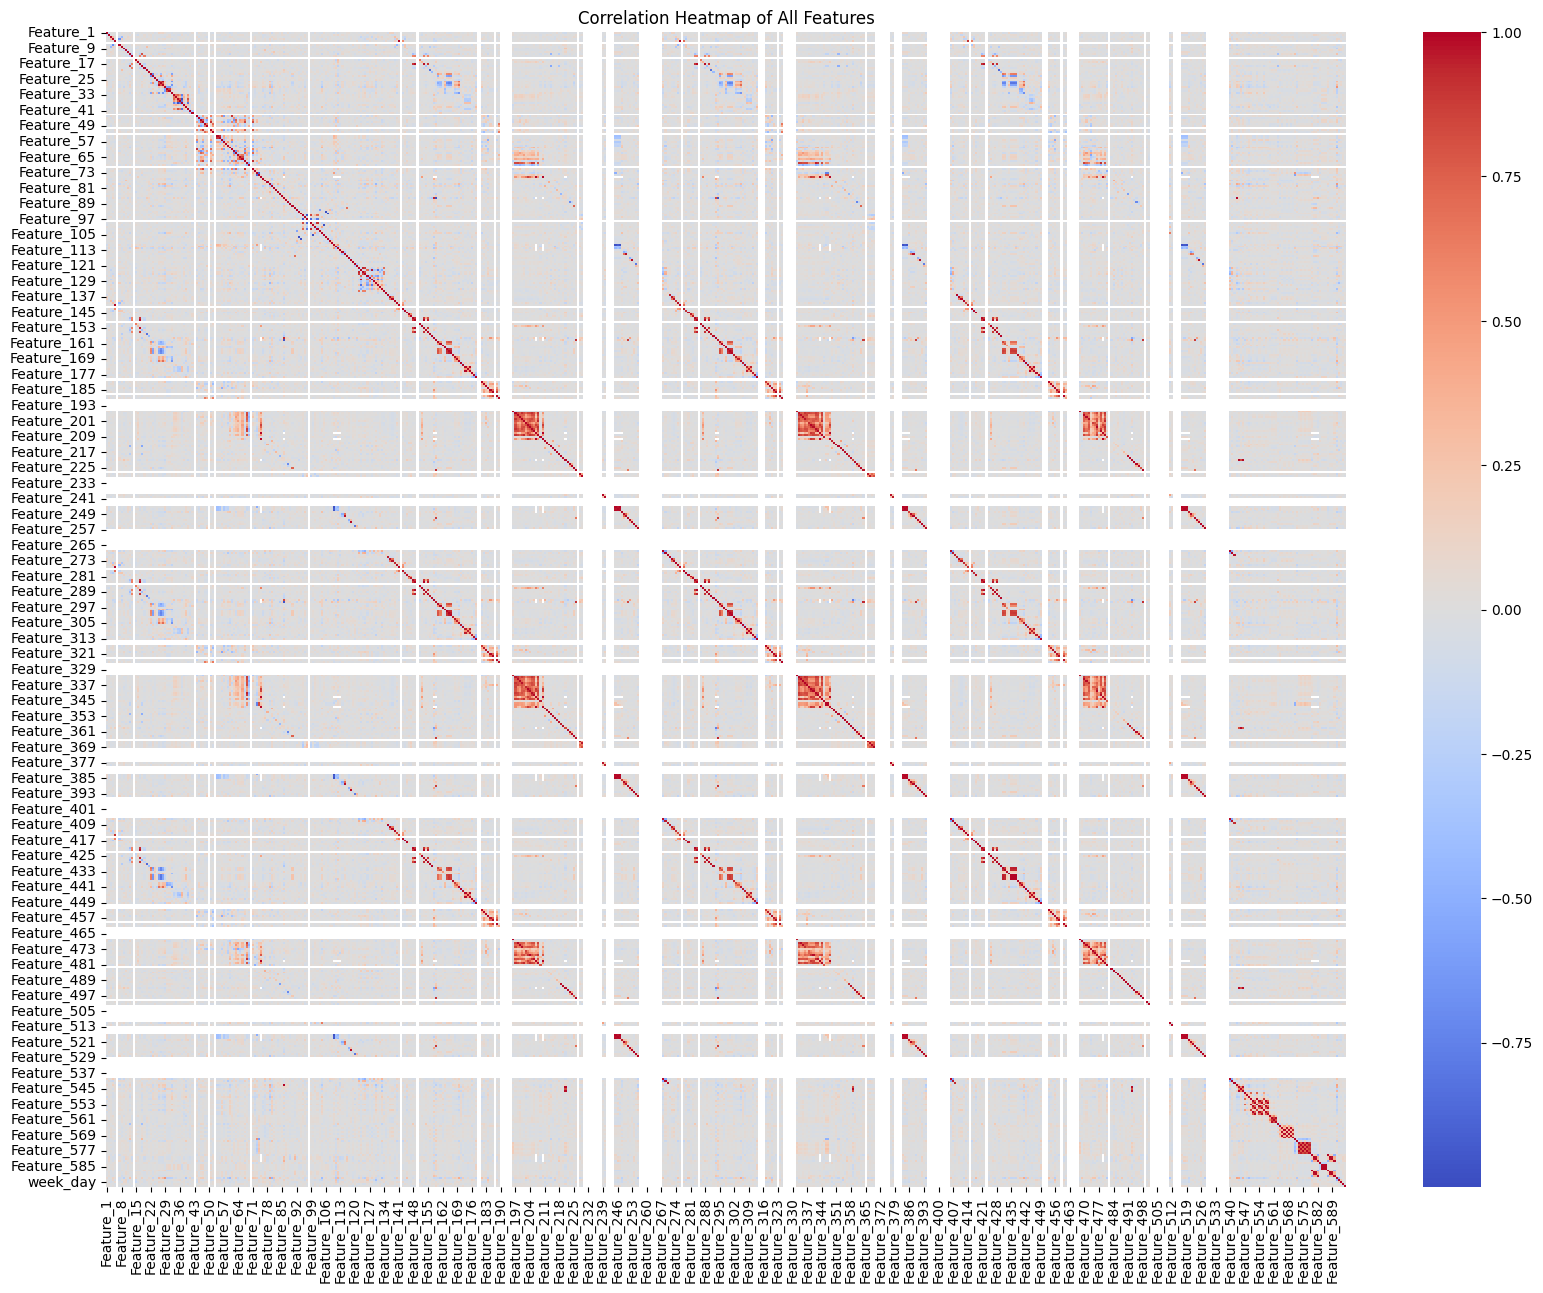

In [ ]:
corr_matrix = X_train.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of All Features')
plt.show()

In [ ]:
missing_percentages = X_train.isnull().mean() * 100

print("Missing Value Percentages:")
print(missing_percentages.sort_values(ascending=False))

missing_percentages_train = X_train.isnull().mean() * 100
missing_percentages_train_sorted = missing_percentages_train.sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x=missing_percentages_train_sorted.index, y=missing_percentages_train_sorted, palette='viridis')
plt.title('Percentage of Missing Values by Feature (Training Set)')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [ ]:
std_devs = train_data.std()
zero_volatility_columns = std_devs[std_devs == 0].index.tolist()
low_volatility_threshold = 0.01
low_volatility_columns = std_devs[(std_devs > 0) & (std_devs < low_volatility_threshold)].index.tolist()
num_zero_volatility_columns = len(zero_volatility_columns)
num_low_volatility_columns = len(low_volatility_columns)

num_zero_volatility_columns, zero_volatility_columns, num_low_volatility_columns, low_volatility_columns

(116,
 ['Feature_6',
  'Feature_14',
  'Feature_43',
  'Feature_50',
  'Feature_53',
  'Feature_70',
  'Feature_98',
  'Feature_142',
  'Feature_150',
  'Feature_179',
  'Feature_180',
  'Feature_187',
  'Feature_190',
  'Feature_191',
  'Feature_192',
  'Feature_193',
  'Feature_194',
  'Feature_195',
  'Feature_227',
  'Feature_230',
  'Feature_231',
  'Feature_232',
  'Feature_233',
  'Feature_234',
  'Feature_235',
  'Feature_236',
  'Feature_237',
  'Feature_238',
  'Feature_241',
  'Feature_242',
  'Feature_243',
  'Feature_244',
  'Feature_257',
  'Feature_258',
  'Feature_259',
  'Feature_260',
  'Feature_261',
  'Feature_262',
  'Feature_263',
  'Feature_264',
  'Feature_265',
  'Feature_266',
  'Feature_267',
  'Feature_277',
  'Feature_285',
  'Feature_314',
  'Feature_315',
  'Feature_316',
  'Feature_323',
  'Feature_326',
  'Feature_327',
  'Feature_328',
  'Feature_329',
  'Feature_330',
  'Feature_331',
  'Feature_365',
  'Feature_370',
  'Feature_371',
  'Feature_372',

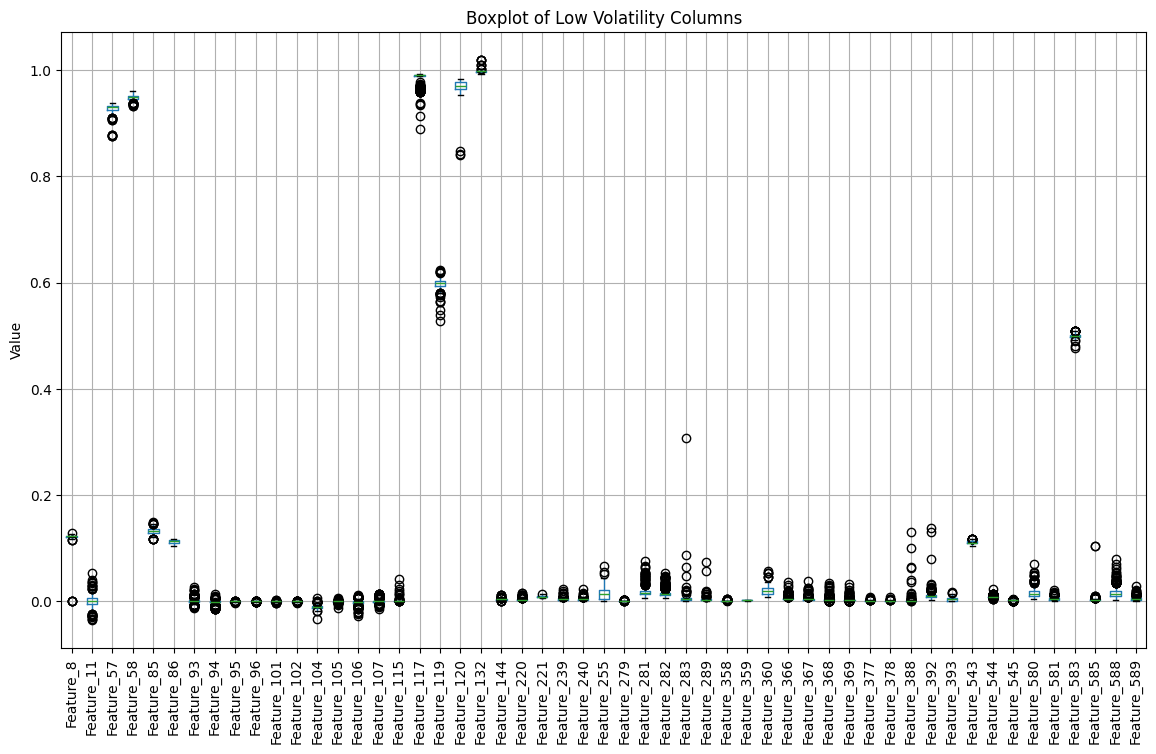

In [ ]:
plt.figure(figsize=(14, 8))
train_data[low_volatility_columns].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of Low Volatility Columns')
plt.ylabel('Value')
plt.show()